In [7]:
import os
import matplotlib.pyplot as plt
from pandas_datareader import DataReader
import pandas as pd; import math; import numpy as np
import scipy
from sklearn import svm
#from sklearn import rcca
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as qda
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
rcParams['figure.figsize'] = 15, 6
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [9]:
import os
path="C:/Users/ascar casas/Documents/MINERIA DE DATOS/Proyecto"
os.chdir(path)
os.getcwd()


data = pd.read_csv('data.csv',sep=',')
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


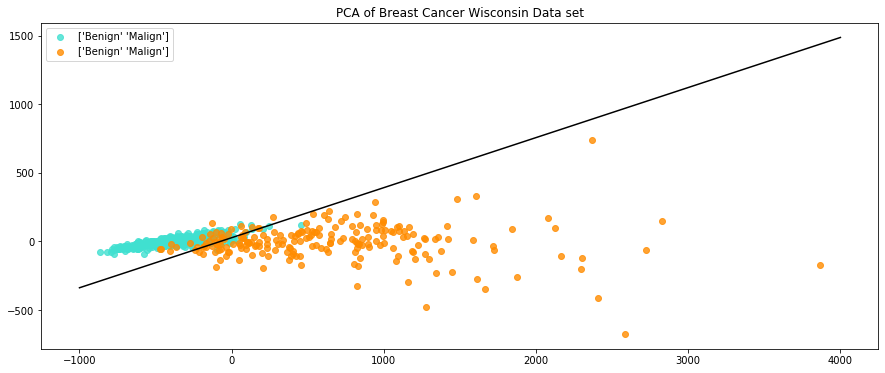

In [10]:
y=pd.get_dummies(data.diagnosis,prefix='diagnosis').iloc[:, 1:]
Y=y.values
Y=Y.T;Y=Y[0]

data=data.values             #it converts a pandas dataframe to an array
X=data[:,2:32]
X

pca = PCA(n_components=2)
Xr = pca.fit(X).transform(X)

#GRAFICA DEL PROYECTO
plt.figure()
colors = ['turquoise', 'darkorange']
lw = 1
target_names = np.array(['Benign','Malign'],dtype='<U10')
for color, i, target_name in zip(colors, [0,1], target_names):
    plt.scatter(Xr[Y == i, 0], Xr[Y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_names)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Breast Cancer Wisconsin Data set')

#After PCA for dimensional reduction

C = 1.0  # SVM regularization parameter
clf = svm.SVC(kernel = 'linear',  gamma=0.7, C=C )
clf.fit(Xr, Y)

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-1000, 4000)
yy = a * xx - (clf.intercept_[0]) / w[1]

plt.plot(xx, yy, 'k-')
plt.show()

In [11]:
#https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
data1 = pd.read_csv('data1.csv',sep=',')
data1.head()

X1 = data1.drop('diagnosis', axis=1) #Datos de x no mas
y1 = data1['diagnosis'] #Datos de y

Xtr, Xts, ytr, yts = train_test_split(X1, y1, test_size = 0.20) #Datos de entrenamiento
data1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
#Linear Kernel
svclassifier = SVC(kernel='linear')
svclassifier.fit(Xtr, ytr) #
y_pred = svclassifier.predict(Xts) #Predecir los nuevos x
print(confusion_matrix(yts,y_pred))
print(classification_report(yts,y_pred))

#Polinomial Kernel
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(Xtr, ytr)
y_pred = svclassifier.predict(Xts)
print(confusion_matrix(yts,y_pred))
print(classification_report(yts,y_pred))

#Gaussian Kernel
svclassifier = SVC(kernel='rbf')
svclassifier.fit(Xtr, ytr)
y_pred = svclassifier.predict(Xts)

print(confusion_matrix(yts,y_pred))
print(classification_report(yts,y_pred))

#Sigmoid Kernel
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(Xtr, ytr)
y_pred = svclassifier.predict(Xts)
print(confusion_matrix(yts,y_pred))
print(classification_report(yts,y_pred))
 

[[36  1]
 [ 3 74]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        37
           1       0.99      0.96      0.97        77

    accuracy                           0.96       114
   macro avg       0.95      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

[[30  7]
 [ 1 76]]
              precision    recall  f1-score   support

           0       0.97      0.81      0.88        37
           1       0.92      0.99      0.95        77

    accuracy                           0.93       114
   macro avg       0.94      0.90      0.92       114
weighted avg       0.93      0.93      0.93       114

[[32  5]
 [ 1 76]]
              precision    recall  f1-score   support

           0       0.97      0.86      0.91        37
           1       0.94      0.99      0.96        77

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg     

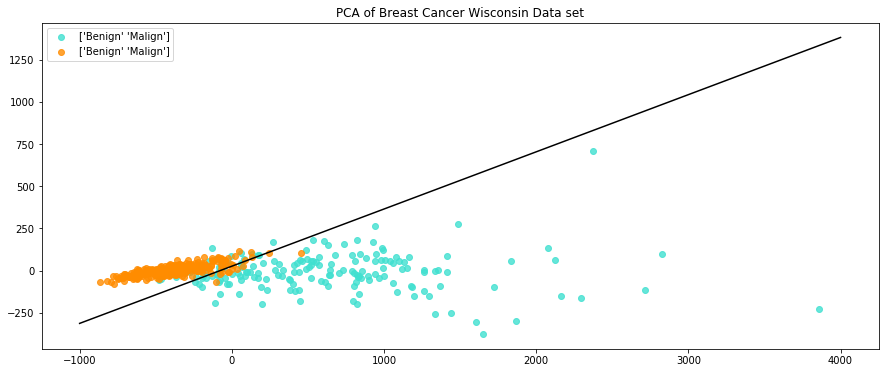

In [13]:
#Reducimos dimensionalidad de los datos ya que con kernel se amplio esa dimension
pca = PCA(n_components=2)
Xr1 = pca.fit(Xtr).transform(Xtr)

plt.figure()
colors = ['turquoise', 'darkorange']
lw = 1
target_names = np.array(['Benign','Malign'],dtype='<U10')
for color, i, target_name in zip(colors, [0,1], target_names):
    plt.scatter(Xr1[ytr == i, 0], Xr1[ytr == i, 1], color=color, alpha=.8, lw=lw,
                label=target_names)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Breast Cancer Wisconsin Data set')

#After PCA for dimensional reduction

C = 1.0  # SVM regularization parameter
clf = svm.SVC(kernel = 'linear',  gamma=0.7, C=C )
clf.fit(Xr1, ytr)

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-1000, 4000)
yy = a * xx - (clf.intercept_[0]) / w[1]

plt.plot(xx, yy, 'k-')
plt.show()

In [14]:
#pip install Pillow==2.2.1
from PIL import Image
import numpy as np
path="C:/Users/ascar casas/Documents/MINERIA DE DATOS/Proyecto/goku.jpg"
img1 = Image.open(path)
ia1 = np.array(img1)

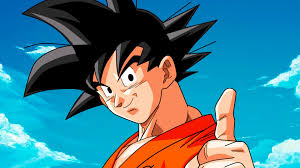

In [13]:
img1

In [19]:
ia1


array([[[  0, 100, 178],
        [  0, 100, 178],
        [  0, 100, 178],
        ...,
        [  0, 117, 186],
        [  0, 117, 186],
        [  0, 117, 186]],

       [[  0, 100, 178],
        [  0, 100, 178],
        [  0, 100, 178],
        ...,
        [  0, 117, 186],
        [  0, 117, 186],
        [  0, 117, 186]],

       [[  0, 100, 178],
        [  0, 100, 178],
        [  0, 100, 178],
        ...,
        [  0, 117, 186],
        [  0, 117, 186],
        [  0, 117, 186]],

       ...,

       [[  2, 201, 230],
        [  2, 201, 230],
        [  2, 201, 230],
        ...,
        [  0, 213, 237],
        [  0, 213, 237],
        [  0, 212, 236]],

       [[  2, 201, 230],
        [  2, 201, 230],
        [  2, 201, 230],
        ...,
        [  3, 212, 234],
        [  1, 212, 233],
        [  0, 212, 234]],

       [[  2, 201, 230],
        [  2, 201, 230],
        [  3, 202, 231],
        ...,
        [  6, 208, 228],
        [  2, 208, 229],
        [  0, 208, 228]]

In [18]:
ia1.shape

(168, 300, 3)